In [175]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [177]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors="coerce") #converting the 'TotalCharges' column to numeric values from string

<html>
    <head><b>ABOUT DATASET</b></head>
    <body>
        <br>
        <br>
        <b>This dataset can be used to create retention strategies that can be used by the companies to hold the customers.</b><br>
        Telco Churn Dataset contains 21 features and 7034 examples. Out of 21 features 18 contains either boolean or text value and the rest 3 contains numeric values which are <i>tenure</i>, <i>MonthlyCharges</i> and <i>TotalCharges</i>.
    </body>
</html>

In [178]:
print("Features of the datatser : "+str(df.columns.tolist()))
print("Number of unique values\n" + str(df.nunique()))

Features of the datatser : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Number of unique values
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [179]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


<html><b>Divided the dataset separately for 'Male' and 'Female' customers.</b><br>Removed the customer ID column.</html>

In [180]:
df.drop(['customerID'], axis = 1, inplace = True)
df_male = df[df['gender'] == 'Male'].reset_index(drop = True)
df_female = df[df['gender'] == 'Female'].reset_index(drop = True)

In [181]:
df_male.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
1,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
4,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [182]:
df_female.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
3,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
4,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [183]:
male_nonSenior = len(df_male[df_male['SeniorCitizen'] == 0])
female_nonSenior = len(df_female[df_female['SeniorCitizen'] == 0])
male_senior = len(df_male[df_male['SeniorCitizen'] == 1])
female_Senior = len(df_female[df_female['SeniorCitizen'] == 1])
print("Number of male non-senior citizens : " + str(male_nonSenior)) #number of male non-senior citizens
print("Number of female non-senior citizens : " + str(female_nonSenior)) #number of female non-senior citizens
print("Number of male senior citizens : " + str(male_senior)) #number of male senior citizens
print("Number of female senior citizens : " + str(female_Senior)) #number of female senior citizens

Number of male non-senior citizens : 2981
Number of female non-senior citizens : 2920
Number of male senior citizens : 574
Number of female senior citizens : 568


Plot showing the count of customers who are 'Female non-senior', 'Female senior','Male non-senior', 'Male senior'


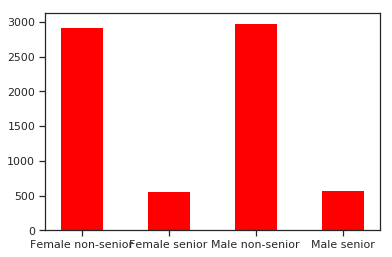

In [184]:
print("Plot showing the count of customers who are 'Female non-senior', 'Female senior','Male non-senior', 'Male senior'")
plt.bar(['Male non-senior','Female non-senior','Male senior','Female senior'],[male_nonSenior,female_nonSenior,male_senior,female_Senior],width = 0.5, color = 'red')
plt.show()

The above graphs interprets that the number of Female non-senior and Male non-senior citizens are nearly same and are much larger than the number of senior citizens.

In [185]:
df_male_monthlyCharges = np.array(df_male['MonthlyCharges'])
df_female_monthlyCharges = np.array(df_female['MonthlyCharges'])
df_male_totalCharges = [w for w in df_male['TotalCharges']]
df_female_totalCharges = np.array(df_female[['TotalCharges']])

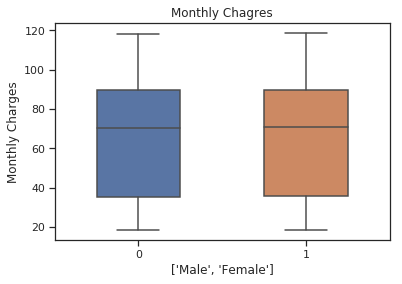

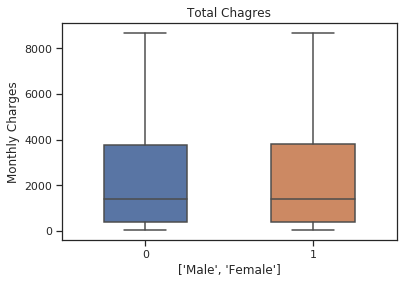

The median, maximum and minimum monthly charges spent by both male and female customers turns out to almost same.


In [186]:
gender = ['Male','Female']
sns.boxplot(data = [df_male_monthlyCharges,df_female_monthlyCharges],width = 0.5).set(xlabel = gender, ylabel = 'Monthly Charges')
plt.title('Monthly Chagres')
plt.show()
plt.title('Total Chagres')
sns.boxplot(data = [df_male_totalCharges,df_female_totalCharges],width = 0.5).set(xlabel = gender, ylabel = 'Monthly Charges')
plt.show()
#0 - male, 1 - female
print("The median, maximum and minimum monthly charges spent by both male and female customers turns out to almost same.")

In [187]:
df_male_onlineSecurity = df_male[['OnlineSecurity']]
df_female_onlineSecurity = df_female[['OnlineSecurity']]

In [188]:
df_male_tenure = np.array(df_male[['tenure']])
df_female_tenure = np.array(df_female[['tenure']])

Histogram showing the the number of customers who have their tenure in the company for the given ranges


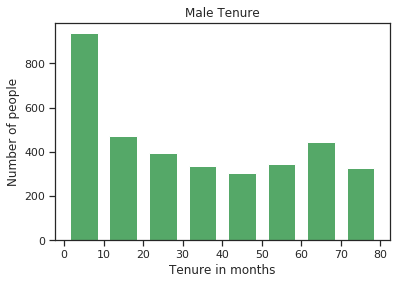

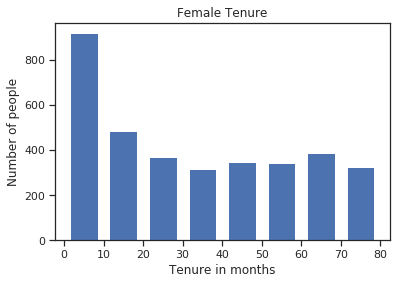

In [189]:
bins = [0,10,20,30,40,50,60,70,80]
print("Histogram showing the the number of customers who have their tenure in the company for the given ranges")
plt.hist(df_male_tenure,bins, rwidth = 0.7, color = 'g')
plt.title('Male Tenure')
plt.xlabel('Tenure in months')
plt.ylabel('Number of people')
plt.show()
plt.hist(df_female_tenure, bins, rwidth = 0.7, color = 'b')
plt.title('Female Tenure')
plt.xlabel('Tenure in months')
plt.ylabel('Number of people')
plt.show()

In [190]:
df_male_PaymentMethod = df_male['PaymentMethod']
df_female_PaymentMethod = df_female['PaymentMethod']
male_PaymentMethod = df_male[['PaymentMethod']]
female_PaymentMethod = df_female[['PaymentMethod']]

Different modes of Payment are :

Mailed check
Bank transfer (automatic)
Credit card (automatic)
Electronic check


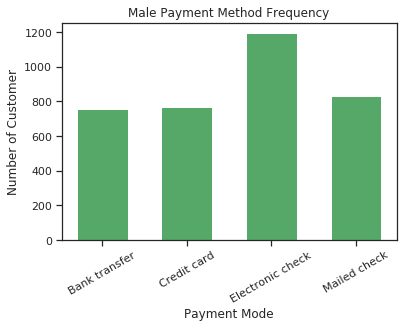

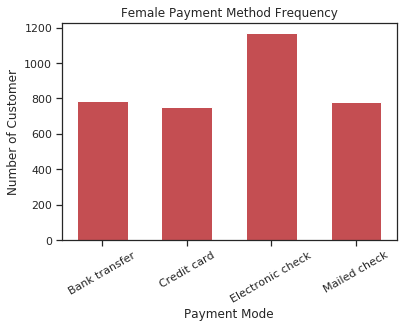

In [191]:
PaymentMethod_unique = df_male_PaymentMethod.unique() #same for both male and female
print("Different modes of Payment are :\n")
for w in PaymentMethod_unique :
    print(w)
male_PaymentMethod = df_male[['PaymentMethod']]
female_PaymentMethod = df_female[['PaymentMethod']]

m = np.zeros(4)
f = np.zeros(4)

dict_male_PaymentMethod = {
    PaymentMethod_unique[0] : m[0],
    PaymentMethod_unique[1] : m[1],
    PaymentMethod_unique[2] : m[2],
    PaymentMethod_unique[3] : m[3]
}

dict_male_PaymentMethod = {
    PaymentMethod_unique[0] : f[0],
    PaymentMethod_unique[1] : f[1],
    PaymentMethod_unique[2] : f[2],
    PaymentMethod_unique[3] : f[3]
}

for i in range(4) :
    m[i] = int(male_PaymentMethod[male_PaymentMethod['PaymentMethod'] == PaymentMethod_unique[i]].count())
    f[i] = int(female_PaymentMethod[female_PaymentMethod['PaymentMethod'] == PaymentMethod_unique[i]].count())
plt.title('Male Payment Method Frequency')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Customer')
plt.bar(['Mailed check','Bank transfer','Credit card','Electronic check'],[m[0],m[1],m[2],m[3]],width = 0.6, color = 'g')
plt.xticks(rotation=30)
plt.show()
plt.title('Female Payment Method Frequency')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Customer')
plt.bar(['Mailed check','Bank transfer','Credit card','Electronic check'],[f[0],f[1],f[2],f[3]],width = 0.6, color = 'r')
plt.xticks(rotation=30)
plt.show()

<html><body>Here clearly, the most preferred mode of payment is 'Electronic check' and 'Bank transfer','Credit card' and 'Mailed check' has almost same priority</body></html>

<html><h4>CHURN vs NON-CHURN</h4></html>

In [192]:
temp_df_male = np.array(df_male['Churn'].replace(['Yes','No'], [1,0]))
temp_df_male = np.append([temp_df_male],[df_male['SeniorCitizen']], axis = 0)
temp_df_female = np.array(df_female['Churn'].replace(['Yes','No'], [1,0]))
temp_df_female = np.append([temp_df_female],[df_female['SeniorCitizen']], axis = 0)

In [193]:
male_SeniorCitizen_Churn = [i  for i in range(len(temp_df_male[0])) if temp_df_male[0][i] == True and temp_df_male[1][i] == True]
male_Senior_Citizen_nonChurn = [i  for i in range(len(temp_df_male[0])) if temp_df_male[0][i] == True and temp_df_male[1][i] == False]
male_nonSenior_Citizen_Churn = [i  for i in range(len(temp_df_male[0])) if temp_df_male[0][i] == False and temp_df_male[1][i] == True]
male_nonSenior_Citizen_nonChurn = [i  for i in range(len(temp_df_male[0])) if temp_df_male[0][i] == False and temp_df_male[1][i] == False]
female_SeniorCitizen_Churn = [i  for i in range(len(temp_df_female[0])) if temp_df_female[0][i] == True and temp_df_female[1][i] == True]
female_Senior_Citizen_nonChurn = [i  for i in range(len(temp_df_female[0])) if temp_df_female[0][i] == True and temp_df_female[1][i] == False]
female_nonSenior_Citizen_Churn = [i  for i in range(len(temp_df_female[0])) if temp_df_female[0][i] == False and temp_df_female[1][i] == True]
female_nonSenior_Citizen_nonChurn = [i  for i in range(len(temp_df_female[0])) if temp_df_female[0][i] == False and temp_df_female[1][i] == False]

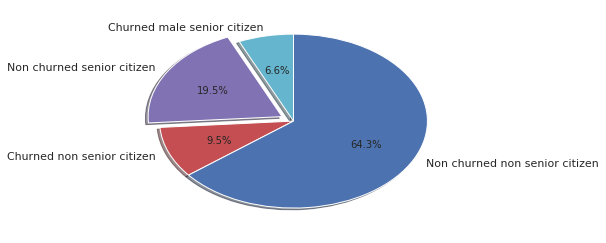

In [194]:
slices = [len(male_SeniorCitizen_Churn),len(male_Senior_Citizen_nonChurn),len(male_nonSenior_Citizen_Churn),len(male_nonSenior_Citizen_nonChurn)]
classes = ['Churned male senior citizen','Non churned senior citizen','Churned non senior citizen','Non churned non senior citizen']
cols = ['c','m','r','b']
plt.pie(slices,
        labels=classes,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')
plt.show()

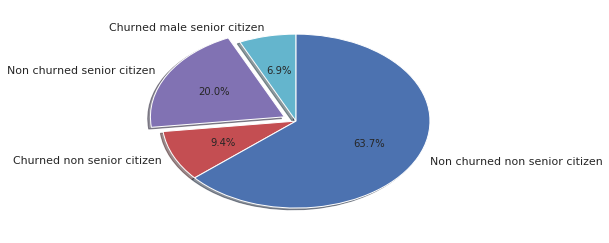

In [195]:
slices = [len(female_SeniorCitizen_Churn),len(female_Senior_Citizen_nonChurn),len(female_nonSenior_Citizen_Churn),len(female_nonSenior_Citizen_nonChurn)]
classes = ['Churned male senior citizen','Non churned senior citizen','Churned non senior citizen','Non churned non senior citizen']
cols = ['c','m','r','b']
plt.pie(slices,
        labels=classes,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')
plt.show()

Plot showing different methods in which the users pay the bill


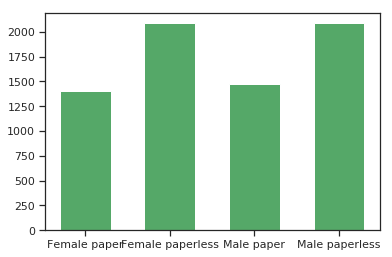

In [196]:
y = [500,1000,1500,2000]
temp_df_malePB =  pd.DataFrame(df_male['PaperlessBilling'].replace(['Yes','No'], [1,0]))
temp_df_femalePB =  pd.DataFrame(df_female['PaperlessBilling'].replace(['Yes','No'], [1,0]))
temp_male_paperlessBill = len(temp_df_malePB[temp_df_malePB['PaperlessBilling'] == 1])
temp_male_bill =  len(temp_df_malePB[temp_df_malePB['PaperlessBilling'] == False])
temp_female_paperlessBill = len(temp_df_femalePB[temp_df_femalePB['PaperlessBilling'] == True])
temp_female_Bill = len(temp_df_femalePB[temp_df_femalePB['PaperlessBilling'] == False])
plt.bar(['Male paperless','Male paper','Female paperless','Female paper'],[temp_male_paperlessBill,temp_male_bill,temp_female_paperlessBill,temp_female_Bill], color = 'g', width = 0.6)
print("Plot showing different methods in which the users pay the bill")
plt.show()

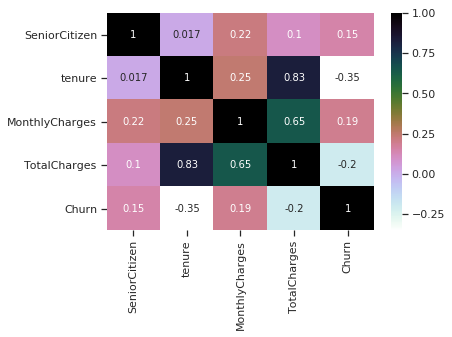

In [197]:
temp = df
temp['Churn'].replace(['Yes','No'],[1,0],inplace = True)
sns.heatmap(temp.corr(), annot=True, cmap='cubehelix_r')
plt.show()

<html>
    <body><p style = "color:blue">There seems to have relatively higher co-relation between Churn and Monthly charges which indirectly implies that those people who would have higher monthly charges  might have left the company. Also, Total Charges has high co-relation with tenure.</p></body>
</html>

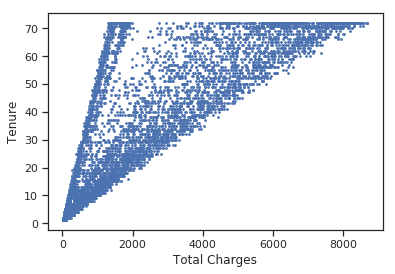

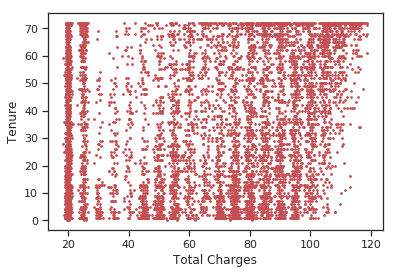

In [198]:
temp_TotalCharges = np.array(df['TotalCharges']);
temp_MonthlyCharges = np.array(df['MonthlyCharges'])
temp_Tenure = np.array(df['tenure'])
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.scatter(temp_TotalCharges, temp_Tenure, s=3)
plt.show()
plt.scatter(temp_MonthlyCharges, temp_Tenure, s=3, color = 'r')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.show()

<html>
<body><h4>Obviously</h4><p>People having low total charges have very less tenure with the company. And people having higher tenure have high total charges. Looking into the monthly charges, people having low monthly charges and high monthly charges have longer tenure with the company than the intermediate ones. </p></body></html>

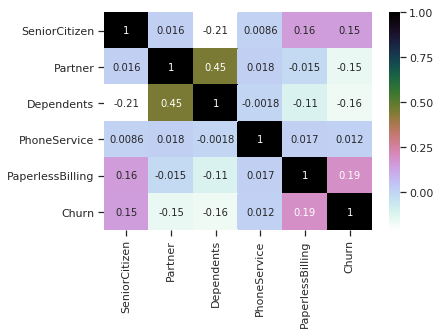

In [199]:
temp_radviz = df.drop(['gender','MultipleLines','InternetService','Contract','PaymentMethod','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','tenure','MonthlyCharges','TotalCharges'], axis = 1)
temp_radviz['Partner'].replace(['Yes','No'],[1,0], inplace = True)
temp_radviz['Dependents'].replace(['Yes','No'],[1,0], inplace = True)
temp_radviz['PhoneService'].replace(['Yes','No'],[1,0], inplace = True)
temp_radviz['PaperlessBilling'].replace(['Yes','No'],[1,0], inplace = True)

col = pd.DataFrame(temp_radviz.columns)
sns.heatmap(temp_radviz.corr(), annot=True, cmap='cubehelix_r')
plt.show()